In [10]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm

# import evaluation tools
from sklearn.model_selection import GridSearchCV

# import cross validation and other evaluation tool 
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict, train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix


In [11]:
df = pd.read_csv("final.csv", index_col=0)
df['Date'] = pd.to_datetime(df['Date'])
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,...,WindDir9am_N,WindDir9am_E,WindDir9am_S,WindDir9am_W,WindDir3pm_N,WindDir3pm_E,WindDir3pm_S,WindDir3pm_W,RainToday_Yes,RainTomorrow_Yes
0,2009-01-01,Albury,0.466981,0.591682,0.0,0.067586,0.931034,0.387597,0.146154,0.356322,...,0.0,0.0,0.0,3.0,1.0,0.0,0.0,2.0,0,0
1,2009-01-02,Albury,0.426887,0.542533,0.0,0.102069,0.944828,0.271318,0.146154,0.126437,...,0.0,0.0,1.0,2.0,0.0,0.0,2.0,1.0,0,0
2,2009-01-03,Albury,0.448113,0.635161,0.0,0.067586,0.944828,0.155039,0.084615,0.080460,...,0.0,1.0,2.0,0.0,0.0,3.0,0.0,0.0,0,0
3,2009-01-04,Albury,0.490566,0.744802,0.0,0.064828,0.834483,0.240310,0.046154,0.195402,...,0.0,1.0,2.0,0.0,1.5,0.0,0.0,1.5,0,0
4,2009-01-05,Albury,0.504717,0.767486,0.0,0.080000,0.924138,0.271318,0.046154,0.298851,...,1.0,2.0,0.0,0.0,1.5,0.0,0.0,1.5,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143124,2017-06-21,Uluru,0.266509,0.533081,0.0,0.013793,0.627586,0.193798,0.100000,0.126437,...,0.0,1.5,1.5,0.0,1.0,2.0,0.0,0.0,0,0
143125,2017-06-22,Uluru,0.285377,0.568998,0.0,0.009655,0.600000,0.124031,0.100000,0.103448,...,0.0,1.5,1.5,0.0,3.0,0.0,0.0,0.0,0,0
143126,2017-06-23,Uluru,0.327830,0.599244,0.0,0.027586,0.406897,0.240310,0.069231,0.103448,...,0.0,1.5,1.5,0.0,1.0,0.0,0.0,2.0,0,0
143127,2017-06-24,Uluru,0.384434,0.601134,0.0,0.027586,0.441379,0.170543,0.100000,0.080460,...,0.0,1.0,2.0,0.0,3.0,0.0,0.0,0.0,0,0


In [114]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,WindDir3pm_N,WindDir3pm_E,WindDir3pm_S,WindDir3pm_W,RainToday_Yes,RainTomorrow_Yes,Spring,Summer,Autumn,Winter
count,143129.000000,143129.000000,143129.000000,143129.000000,143129.000000,143129.000000,143129.000000,143129.000000,143129.000000,143129.000000,...,143129.000000,143129.000000,143129.000000,143129.000000,143129.000000,143129.000000,143129.000000,143129.000000,143129.000000,143129.000000
mean,0.487952,0.529784,0.006436,0.037181,0.523931,0.264068,0.107974,0.214588,0.690513,0.517166,...,0.688749,0.729911,0.805165,0.776174,0.225412,0.225419,0.241593,0.239567,0.266054,0.252786
std,0.150720,0.134702,0.023097,0.028147,0.261474,0.105352,0.068676,0.101360,0.190493,0.207981,...,0.939560,0.943337,0.968942,0.977599,0.417855,0.417859,0.428051,0.426821,0.441894,0.434611
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.379717,0.429112,0.000000,0.017931,0.331034,0.193798,0.053846,0.149425,0.570000,0.370000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.483491,0.517958,0.000000,0.031724,0.586207,0.255814,0.100000,0.218391,0.700000,0.520000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.596698,0.623819,0.002156,0.051034,0.724138,0.325581,0.146154,0.275862,0.830000,0.660000,...,1.500000,1.500000,1.500000,1.500000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,3.000000,3.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [12]:
# define attributes and target variable
features = ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm',
       'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am',
       'Cloud3pm', 'Temp9am', 'Temp3pm', 'WindGustDir_N', 'WindGustDir_E',
       'WindGustDir_S', 'WindGustDir_W', 'WindDir9am_N', 'WindDir9am_E',
       'WindDir9am_S', 'WindDir9am_W', 'WindDir3pm_N', 'WindDir3pm_E',
       'WindDir3pm_S', 'WindDir3pm_W', 'RainToday_Yes']
target = ['RainTomorrow_Yes']
X = df[features]
y = df[target]

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
#import warnings
#warnings.filterwarnings('ignore') # hide warning for better illustration only

def LogitReg(data, features, target, value):
    counter = 0
    droplist = []
    print('{}'.format(data.Location.unique()))
    while True:
        features = [i for i in features if i not in droplist]
        X = data[features]
        y = data[target]
        X_train,X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 42)
        yact = y_train.values.ravel()
    
    # try different hyperparameter
        c = [1,10,100,1000]
        penalty = ['l2']
        solver = ['newton-cg', 'lbfgs','liblinear','sag']

        try_grid = [{"C":c,
                     'penalty':penalty,
                     'solver':solver,
                     'random_state':[42],
                    'max_iter':[1000]}]

    # define your Model using GridSearchCV
        lr = GridSearchCV(LogisticRegression(), param_grid=try_grid,scoring = 'accuracy', cv=5)
        lr.fit(X_train,yact)
    
    # find the best parameters
        counter +=1 
        print('Trial {:d}'.format(counter))
        print('Best Paramater: ' ,lr.best_params_)
        print("Accuracy: {:.2%}\n".format(lr.best_score_))
    
        best_lr_model = LogisticRegression(**lr.best_params_)
        best_lr_model.fit(X_train,yact)
    
    # get importance
        importance = best_lr_model.coef_[0]
    # summarize feature importance
        score = pd.DataFrame(columns=["Features","Score"])
        for v,j in zip(importance,features):
            df2 = pd.DataFrame({"Features": [j],"Score":[v]})
            score = score.append(df2, ignore_index = True)
        droplist = list(score[score["Score"].abs()<value]["Features"])
        
        if droplist==[]:
            break
    #Logistic Regression
    pred_y = best_lr_model.predict(X_train)

    print(classification_report(yact, pred_y))
    return score,lr.best_score_

In [14]:
%%time
score,accuracy =LogitReg(df,features,target,0.5)

['Albury' 'BadgerysCreek' 'Cobar' 'CoffsHarbour' 'Moree' 'Newcastle'
 'NorahHead' 'NorfolkIsland' 'Penrith' 'Richmond' 'Sydney' 'SydneyAirport'
 'WaggaWagga' 'Williamtown' 'Wollongong' 'Canberra' 'Tuggeranong'
 'MountGinini' 'Ballarat' 'Bendigo' 'Sale' 'MelbourneAirport' 'Melbourne'
 'Mildura' 'Nhil' 'Portland' 'Watsonia' 'Dartmoor' 'Brisbane' 'Cairns'
 'GoldCoast' 'Townsville' 'Adelaide' 'MountGambier' 'Nuriootpa' 'Woomera'
 'Albany' 'Witchcliffe' 'PearceRAAF' 'PerthAirport' 'Perth' 'SalmonGums'
 'Walpole' 'Hobart' 'Launceston' 'AliceSprings' 'Darwin' 'Katherine'
 'Uluru']
Trial 1
Best Paramater:  {'C': 100, 'max_iter': 1000, 'penalty': 'l2', 'random_state': 42, 'solver': 'sag'}
Accuracy: 84.72%

Trial 2
Best Paramater:  {'C': 100, 'max_iter': 1000, 'penalty': 'l2', 'random_state': 42, 'solver': 'lbfgs'}
Accuracy: 84.68%

Trial 3
Best Paramater:  {'C': 100, 'max_iter': 1000, 'penalty': 'l2', 'random_state': 42, 'solver': 'newton-cg'}
Accuracy: 84.66%

              precision    recall

In [16]:
import sklearn.metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
X = df[features]
y = df[target]
X_train,X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 42)
yact = y_train.values.ravel()
yact_test = y_test.values.ravel()

#Logistic Regression
best_lr_model = LogisticRegression(**{'C': 100, 'max_iter': 1000, 'penalty': 'l2', 'random_state': 42, 'solver': 'newton-cg'})
best_lr_model.fit(X_train,yact)
pred_y = best_lr_model.predict(X_train)

print(classification_report(yact, pred_y))
print(sklearn.metrics.recall_score(yact, pred_y))

              precision    recall  f1-score   support

           0       0.87      0.94      0.91     88585
           1       0.72      0.52      0.61     25918

    accuracy                           0.85    114503
   macro avg       0.80      0.73      0.76    114503
weighted avg       0.84      0.85      0.84    114503

0.523497183424647


In [19]:
from sklearn.metrics import roc_curve, roc_auc_score
predict_proba =best_lr_model.predict_proba(X_test)
print("Area under the curve = ", roc_auc_score(y_test, predict_proba[:,1]))

Area under the curve =  0.8731082104901036


<function matplotlib.pyplot.show(close=None, block=None)>

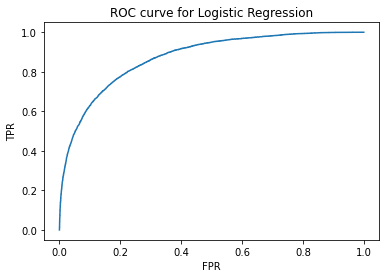

In [20]:
import matplotlib.pyplot as plt
fpr,tpr, _ = roc_curve(y_test, predict_proba[:,1])
plt.plot(fpr,tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve for Logistic Regression')
plt.show

In [89]:
score

,Features,Score
0,Rainfall,2.510506
1,Sunshine,-1.592981
2,WindGustSpeed,6.797300
3,WindSpeed9am,-1.362844
4,WindSpeed3pm,-1.823598
5,Humidity3pm,5.176099
6,Pressure9am,8.890110
7,Pressure3pm,-12.760595
8,Cloud3pm,1.115209
9,RainToday_Yes,0.584356


## Error Examination

              precision    recall  f1-score   support

           0       0.87      0.94      0.91     22280
           1       0.72      0.52      0.61      6346

    accuracy                           0.85     28626
   macro avg       0.80      0.73      0.76     28626
weighted avg       0.84      0.85      0.84     28626



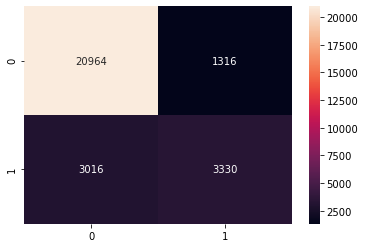

In [92]:
pred_y = best_lr_model.predict(X_test)
sns.heatmap(confusion_matrix(y_test, pred_y), annot=True,fmt='d')

print(classification_report(y_test, pred_y))


In [38]:
df2 = pd.merge(X_train, df[['Date','Location']], left_index=True, right_index=True)
cols = df2.columns.tolist()
df2 = df2[cols[-2:] + cols[:-2]]
df2['yact'] = yact
df2['pred_y']= pred_y
df2

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,...,WindDir3pm_E,WindDir3pm_S,WindDir3pm_W,RainToday_Yes,Spring,Summer,Autumn,Winter,yact,pred_y
134661,2010-12-08,AliceSprings,0.773585,0.814745,0.000539,0.102069,0.627586,0.542636,0.253846,0.103448,...,1.5,1.5,0.0,0,0,1,0,0,1,0
71104,2014-06-18,Mildura,0.280660,0.408318,0.000000,0.012414,0.593103,0.124031,0.046154,0.045977,...,2.0,0.0,0.0,0,0,0,0,1,0,0
124197,2015-06-23,SalmonGums,0.400943,0.372401,0.038814,0.008276,0.565517,0.155039,0.084615,0.218391,...,0.0,2.0,1.0,1,0,0,0,1,0,0
116639,2010-12-29,PerthAirport,0.606132,0.667297,0.000000,0.080000,0.903448,0.310078,0.146154,0.321839,...,0.0,1.0,2.0,0,0,1,0,0,0,0
3029,2009-01-21,BadgerysCreek,0.683962,0.816635,0.001078,0.088276,0.510345,0.271318,0.084615,0.126437,...,0.0,1.0,2.0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110268,2010-01-10,Witchcliffe,0.561321,0.534972,0.000000,0.057931,0.648276,0.271318,0.153846,0.275862,...,0.0,2.0,1.0,0,0,1,0,0,0,0
119879,2011-09-16,Perth,0.540094,0.497164,0.043127,0.013793,0.386207,0.372093,0.053846,0.275862,...,0.0,0.0,1.5,1,1,0,0,0,1,1
103694,2016-12-26,Nuriootpa,0.712264,0.500945,0.000000,0.103448,0.000000,0.426357,0.100000,0.172414,...,1.5,0.0,0.0,0,0,1,0,0,1,1
131932,2011-10-14,Launceston,0.318396,0.485822,0.000000,0.019310,0.489655,0.186047,0.015385,0.172414,...,1.5,0.0,0.0,0,1,0,0,0,1,0


In [42]:
TP = df2.loc[(df2["yact"]==1) & (df2["pred_y"]==1)]
FP = df2.loc[(df2["yact"]==0) & (df2["pred_y"]==1)]
TN = df2.loc[(df2["yact"]==0) & (df2["pred_y"]==0)]
FN = df2.loc[(df2["yact"]==1) & (df2["pred_y"]==0)]

In [50]:
accuracy = (len(TP)+len(TN))/(len(TP)+len(TN)+len(FP)+len(FN))
recall = len(TP)/(len(TP)+len(FN))
precision = len(TP)/(len(TP)+len(FP))
F1score = 2*(precision*recall/(precision+recall))

print("Accuracy: {:.2%}".format(accuracy))
print("Recall: {:.2%}".format(recall))
print("Precision: {:.2%}".format(precision))
print("F1score: {:.2%}".format(F1score))

Accuracy: 84.75%
Recall: 52.50%
Precision: 72.52%
F1score: 60.91%


In [51]:
df2["TP"]= np.where((df2["yact"]==1) & (df2["pred_y"]==1), 1, 0)
df2["FP"]= np.where((df2["yact"]==0) & (df2["pred_y"]==1), 1, 0)
df2["TN"]= np.where((df2["yact"]==0) & (df2["pred_y"]==0), 1, 0)
df2["FN"]= np.where((df2["yact"]==1) & (df2["pred_y"]==0), 1, 0)
df2

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,...,Spring,Summer,Autumn,Winter,yact,pred_y,TP,FP,TN,FN
134661,2010-12-08,AliceSprings,0.773585,0.814745,0.000539,0.102069,0.627586,0.542636,0.253846,0.103448,...,0,1,0,0,1,0,0,0,0,1
71104,2014-06-18,Mildura,0.280660,0.408318,0.000000,0.012414,0.593103,0.124031,0.046154,0.045977,...,0,0,0,1,0,0,0,0,1,0
124197,2015-06-23,SalmonGums,0.400943,0.372401,0.038814,0.008276,0.565517,0.155039,0.084615,0.218391,...,0,0,0,1,0,0,0,0,1,0
116639,2010-12-29,PerthAirport,0.606132,0.667297,0.000000,0.080000,0.903448,0.310078,0.146154,0.321839,...,0,1,0,0,0,0,0,0,1,0
3029,2009-01-21,BadgerysCreek,0.683962,0.816635,0.001078,0.088276,0.510345,0.271318,0.084615,0.126437,...,0,1,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110268,2010-01-10,Witchcliffe,0.561321,0.534972,0.000000,0.057931,0.648276,0.271318,0.153846,0.275862,...,0,1,0,0,0,0,0,0,1,0
119879,2011-09-16,Perth,0.540094,0.497164,0.043127,0.013793,0.386207,0.372093,0.053846,0.275862,...,1,0,0,0,1,1,1,0,0,0
103694,2016-12-26,Nuriootpa,0.712264,0.500945,0.000000,0.103448,0.000000,0.426357,0.100000,0.172414,...,0,1,0,0,1,1,1,0,0,0
131932,2011-10-14,Launceston,0.318396,0.485822,0.000000,0.019310,0.489655,0.186047,0.015385,0.172414,...,1,0,0,0,1,0,0,0,0,1


In [111]:
data = df2[['Date', 'Location', 'TP', 'FP','TN', 'FN']].groupby(['Location']).agg([(np.sum)])
data.columns = data.columns.droplevel(1)
data = data.div(data.sum(axis=1), axis=0)*100

data.reset_index(inplace=True)

data["Accuracy"] = data.TP + data.TN
data = data.sort_values("Accuracy", ascending=False).reset_index(drop = True)
data

,Location,TP,FP,TN,FN,Accuracy
0,AliceSprings,3.849408,1.226734,90.820643,4.103215,94.670051
1,Uluru,2.753737,0.708104,91.502754,5.035405,94.256491
2,Woomera,2.859546,1.850294,91.211102,4.079058,94.070648
3,Mildura,4.305043,1.599016,87.822878,6.273063,92.127921
4,Cobar,5.897010,1.536545,84.966777,7.599668,90.863787
5,Moree,6.883605,2.169378,82.728411,8.218607,89.612015
6,PerthAirport,8.512397,1.280992,80.371901,9.834711,88.884298
7,Nhil,8.253205,3.605769,80.528846,7.612179,88.782051
8,WaggaWagga,8.171688,1.774660,80.313661,9.739992,88.485349
9,Townsville,9.808917,4.925690,78.471338,6.794055,88.280255


Text(0.5, 0, 'Index')

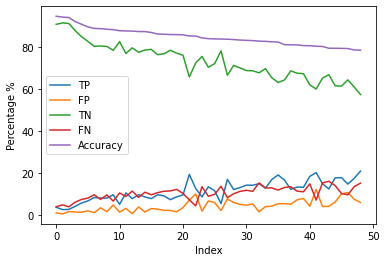

In [112]:
lines = data.plot.line()
lines.set_ylabel("Percentage %")
lines.set_xlabel("Index")

## Simple ANN

In [80]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings('ignore') # hide warning for better illustration only

X = df[features]
y = df[target]
X_train,X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 42)
yact = y_train.values.ravel()

In [81]:
#Check the dimension of the data
print('Train dimension:',X_train.shape)
print('X-Label dimension:', y_train.shape)
print('Test dimension:',X_test.shape)
print('Y-Label dimension:', y_test.shape)

Train dimension: (114503, 33)
X-Label dimension: (114503, 1)
Test dimension: (28626, 33)
Y-Label dimension: (28626, 1)


In [95]:
%%time
# import split
#import all useful packages
import tensorflow as tf    #tensorflow is used for building neural network
from tensorflow.keras import datasets, layers, models  #keras is more conveient and handy tools
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score


#Define network structure
#Flatten X_train, then pass through two layers and final sigmoid layer to give result
ann = models.Sequential([
     layers.Flatten(input_shape=(33,)),
    layers.Dense(500,activation='relu'),
    layers.Dense(300,activation='relu'),
     layers.Dense(100,activation='relu'),
    layers.Dense(1,activation='sigmoid')
     ])
ann.compile(optimizer='Adam',
    loss='binary_crossentropy',
    metrics=['Recall'])

history = ann.fit(X_train,y_train,validation_data = (X_test,y_test),epochs=20,batch_size=64)

print("\nValidation:")
a,b = ann.evaluate(X_test,y_test)
print("Validation Accuracy: {:.2%}".format(b))

Epoch 1/20
1790/1790 [==============================] - 8s 4ms/step - loss: 0.3871 - recall: 0.4254 - val_loss: 0.3566 - val_recall: 0.5957
Epoch 2/20
1790/1790 [==============================] - 7s 4ms/step - loss: 0.3507 - recall: 0.5174 - val_loss: 0.3473 - val_recall: 0.4099
Epoch 3/20
1790/1790 [==============================] - 9s 5ms/step - loss: 0.3488 - recall: 0.5057 - val_loss: 0.3435 - val_recall: 0.5446
Epoch 4/20
1790/1790 [==============================] - 9s 5ms/step - loss: 0.3444 - recall: 0.5213 - val_loss: 0.3441 - val_recall: 0.4745
Epoch 5/20
1790/1790 [==============================] - 7s 4ms/step - loss: 0.3430 - recall: 0.5219 - val_loss: 0.3391 - val_recall: 0.5243
Epoch 6/20
1790/1790 [==============================] - 9s 5ms/step - loss: 0.3412 - recall: 0.5178 - val_loss: 0.3412 - val_recall: 0.5693
Epoch 7/20
1790/1790 [==============================] - 9s 5ms/step - loss: 0.3356 - recall: 0.5361 - val_loss: 0.3406 - val_recall: 0.4850
Epoch 8/20
1790/1790

In [96]:
pred_y = ann.predict_classes(X_test).ravel()
yact_test = y_test.values.ravel()
print(classification_report(yact_test, pred_y))

              precision    recall  f1-score   support

           0       0.88      0.93      0.91     22280
           1       0.71      0.56      0.62      6346

    accuracy                           0.85     28626
   macro avg       0.79      0.75      0.77     28626
weighted avg       0.84      0.85      0.84     28626



In [93]:
features

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm',
 'WindGustDir_N',
 'WindGustDir_E',
 'WindGustDir_S',
 'WindGustDir_W',
 'WindDir9am_N',
 'WindDir9am_E',
 'WindDir9am_S',
 'WindDir9am_W',
 'WindDir3pm_N',
 'WindDir3pm_E',
 'WindDir3pm_S',
 'WindDir3pm_W',
 'RainToday_Yes',
 'Spring',
 'Summer',
 'Autumn',
 'Winter']